# Time Series Analysis of JPMorgan Chase & Co. Stock Prices

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import seaborn as sns

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.gofplots import qqplot
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

This project aims to analyze the stock price movements of JPMorgan Chase & Co. using time series forecasting techniques. By applying models such as ARIMA, we seek to identify patterns, assess stationarity, and generate future price predictions based on historical data.

In [ ]:
df = pd.read_csv('JPMorgan_Chase_Co.csv')
df.head()
df.tail()

,Date,Close
35,30-Jan,268.23
36,29-Jan,266.58
37,28-Jan,267.14
38,27-Jan,265.85
39,24-Jan,264.84


## Data Source & Background

The non-seasonal dataset was obtained from NASDAQ, a leading stock exchange, and contains daily closing prices of JPMorgan Chase & Co. (JPM). The original dataset included a larger range of observations, but for the purpose of this study, it was narrowed down to the most recent 40 observations to focus on short-term trends and fluctuations.

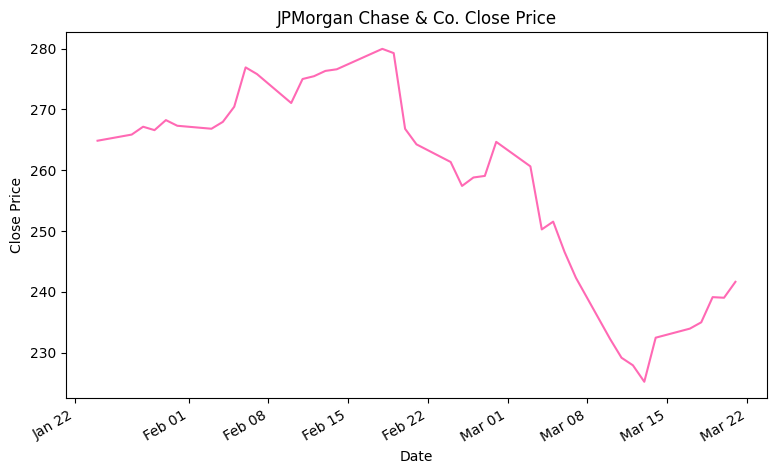

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b')


fig, ax = plt.subplots(figsize=(8, 5))

# Plotting the time series
fig.autofmt_xdate()
plt.plot(df['Date'], df['Close'], color='hotpink')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('JPMorgan Chase & Co. Close Price')
plt.tight_layout()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))


plt.savefig('figures.png', dpi=300)
plt.show()


JPMorgan Chase & Co. is one of the largest financial institutions in the world, and its stock price reflects both company performance and broader economic conditions. The data includes fluctuations due to market trends, investor sentiment, and external economic factors.


## Time-Series Visualization

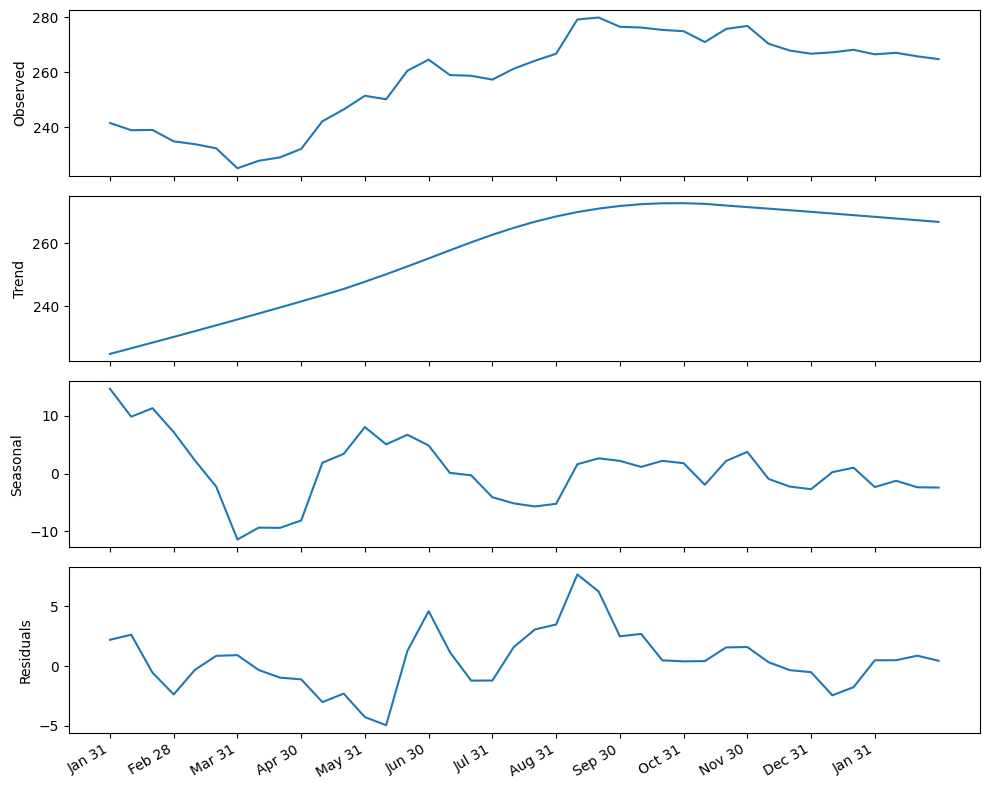

In [ ]:
decomposition = STL(df['Close'], period=12).fit()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')

num_ticks = len(np.arange(0, 39, 3))
years = pd.date_range(start='2022-01-22', periods=num_ticks, freq='M')
plt.xticks(np.arange(0, 39, 3), years.strftime('%b %d'))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures.png', dpi=300)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures.png', dpi=300)

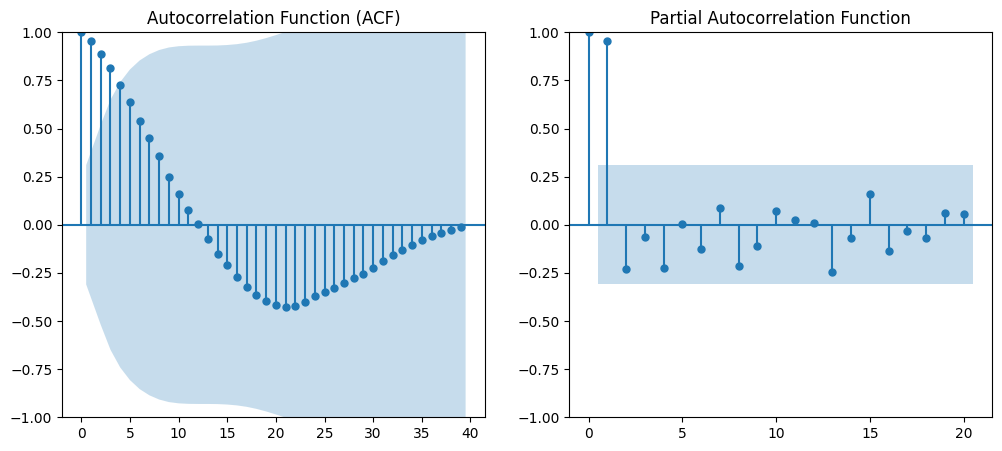

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(df['Close'], lags=39, ax=axes[0])
plot_pacf(df['Close'], lags=20, ax=axes[1])
axes[0].set_title('Autocorrelation Function (ACF)')
axes[1].set_title('Partial Autocorrelation Function')

plt.savefig('figures.png', dpi=300)
plt.show()

## Tentative Model Identification


Autocorrelation Function (ACF) Analysis:
The ACF plot exhibits a slow decay, indicating strong autocorrelation at lower lags.
This suggests that the data is non-stationary, likely containing a trend.
A downward oscillating pattern in ACF suggests the presence of a seasonal component.
Partial Autocorrelation Function (PACF) Analysis:
The PACF plot shows a sharp cutoff after lag 1, meaning the series exhibits an AR(1) process.
The significant first few lags suggest that the closing prices depend primarily on their most recent values.
Interpretation:
The slow decay in ACF suggests a need for differencing to make the data stationary.

Given the PACF behavior, an ARIMA (p=1, d=1, q=0) model might be a good starting point for forecasting.
If seasonality is present, an SARIMA model should be considered.


## Next Steps
We will implement time series forecasting models such as:
ARIMA (AutoRegressive Integrated Moving Average) to capture trends and dependencies in
stock price movement.
ETS (Error, Trend, Seasonality) for comparison if needed.
Model evaluation based on statistical tests, residual diagnostics, and forecast accuracy.
